In [2]:
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
train_df = pd.read_csv('../../data/train.csv')
test_df = pd.read_csv('../../data/test.csv')

In [ ]:
y_train_death = train_df['Death']
y_train_desease = train_df['Progressive disease']
train_df = train_df.drop(['Death', 'Progressive disease'], axis=1)


In [11]:
y_test_death = test_df['Death']
y_test_desease = test_df['Progressive disease']
test_df = test_df.drop(['Death', 'Progressive disease'], axis=1)

In [16]:
#neutropenia -> to remove
plot = False
if plot:
    for column in train_df.columns:
        plt.figure(figsize=(10, 6))
        if train_df[column].dtype == 'object':
            train_df[column].value_counts().plot(kind='bar')
        if train_df[column].dtype == 'int64' or train_df[column].dtype == 'float64':
            if train_df[column].nunique() < 5:
                train_df[column].value_counts().plot(kind='bar')
            else:
                plt.hist(train_df[column], bins=30, edgecolor='k', alpha=0.7)
        plt.title(f'Univariate plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [17]:
from sklearn.preprocessing import minmax_scale
for column in train_df.columns:
    if train_df[column].dtype == 'int64' or train_df[column].dtype == 'float64':
            if train_df[column].nunique() > 15:
                train_df[column] = minmax_scale(train_df[column])

# scaler = minmax_scale(train_df)

In [46]:
#import a SVM model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


#grid search for best hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear','poly','rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(train_df, y_train_desease)

print(grid.best_params_)
C=grid.best_params_['C']
gamma=grid.best_params_['gamma']
kernel=grid.best_params_['kernel']
#train the model with the best hyperparameters
model = SVC(C=C, gamma=gamma, kernel=kernel)

# model = SVC(C=100, gamma=0.1, kernel='rbf')
model.fit(train_df, y_train_desease)

#predict the test set
predictions = model.predict(test_df)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_desease, predictions))
print(classification_report(y_test_desease, predictions))




{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
[[18  0]
 [15  0]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71        18
           1       0.00      0.00      0.00        15

    accuracy                           0.55        33
   macro avg       0.27      0.50      0.35        33
weighted avg       0.30      0.55      0.39        33



c:\Users\USER\Desktop\Personal\Bits\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\Desktop\Personal\Bits\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\USER\Desktop\Personal\Bits\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [65]:
train_df.columns

Index(['Sex', 'Age at diagnosis', 'Binary diagnosis', 'Final diagnosis',
       'TOBACCO', 'Comorbidities', 'Pathology Pattern Binary',
       'Multidsciplinary committee', 'Pirfenidone', 'Nintedanib',
       'Antifibrotic Drug', 'Prednisone', 'Mycophenolate',
       'Extrapulmonary affectation', 'Associated lung cancer', 'Other cancer',
       'Blood count abnormality at diagnosis', 'Anemia', 'Thrombocytopenia',
       'Thrombocytosis', 'Lymphocytosis', 'Lymphopenia', 'Neutrophilia',
       'Neutropenia', 'Leukocytosis', 'Leukopenia', 'Hematologic Disease',
       'Liver abnormality', 'LDH', 'ALT', 'AST', 'ALP', 'GGT', 'Transaminitis',
       'Cholestasis', 'Liver disease', 'FVC (L) at diagnosis',
       'FVC (%) at diagnosis', 'DLCO (%) at diagnosis',
       'FVC (L) 1 year after diagnosis', 'FVC (%) 1 year after diagnosis',
       'DLCO (%) 1 year after diagnosis', 'RadioWorsening2y',
       'Transplantation', 'Type of family history', '1st degree relative',
       '2nd degree relat

In [81]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
train_no_2y = train_df.drop('RadioWorsening2y', axis=1)
test_no_2y = test_df.drop('RadioWorsening2y', axis=1)
xgb = XGBClassifier()

dtrain_reg = xgb.DMatrix(train_no_2y, y_train_death, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)
#Grid search for best hyperparameters
# param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
# grid = GridSearchCV(XGBClassifier(), param_grid, refit=True, verbose=0)
grid.fit(train_no_2y, y_train_death)




c:\Users\USER\Desktop\Personal\Bits\.venv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [48]:
for i in range(len(train_df.columns)):
    print(f'{train_df.columns[i]}: {dtc.feature_importances_[i]}')

Sex: 0.0
Age at diagnosis: 0.0
Binary diagnosis: 0.0
Final diagnosis: 0.0
TOBACCO: 0.0
Comorbidities: 0.0
Pathology Pattern Binary: 0.0
Multidsciplinary committee: 0.0
Pirfenidone: 0.0
Nintedanib: 0.0
Antifibrotic Drug: 0.0
Prednisone: 0.0
Mycophenolate: 0.0
Extrapulmonary affectation: 0.0
Associated lung cancer: 0.0
Other cancer: 0.0
Blood count abnormality at diagnosis: 0.0
Anemia: 0.0
Thrombocytopenia: 0.0
Thrombocytosis: 0.0
Lymphocytosis: 0.0
Lymphopenia: 0.0
Neutrophilia: 0.0
Neutropenia: 0.0
Leukocytosis: 0.0
Leukopenia: 0.0
Hematologic Disease: 0.0
Liver abnormality: 0.0
LDH: 0.0
ALT: 0.0
AST: 0.0
ALP: 0.0
GGT: 0.0
Transaminitis: 0.0
Cholestasis: 0.0
Liver disease: 0.0
FVC (L) at diagnosis: 0.0
FVC (%) at diagnosis: 0.0
DLCO (%) at diagnosis: 0.0
FVC (L) 1 year after diagnosis: 0.0
FVC (%) 1 year after diagnosis: 0.11495500437462897
DLCO (%) 1 year after diagnosis: 0.0
RadioWorsening2y: 0.885044995625371
Transplantation: 0.0
Type of family history: 0.0
1st degree relative: 0.0


In [54]:
train_df["RadioWorsening2y"].unique()

array([0., 1., 3.])

In [57]:
import numpy as np

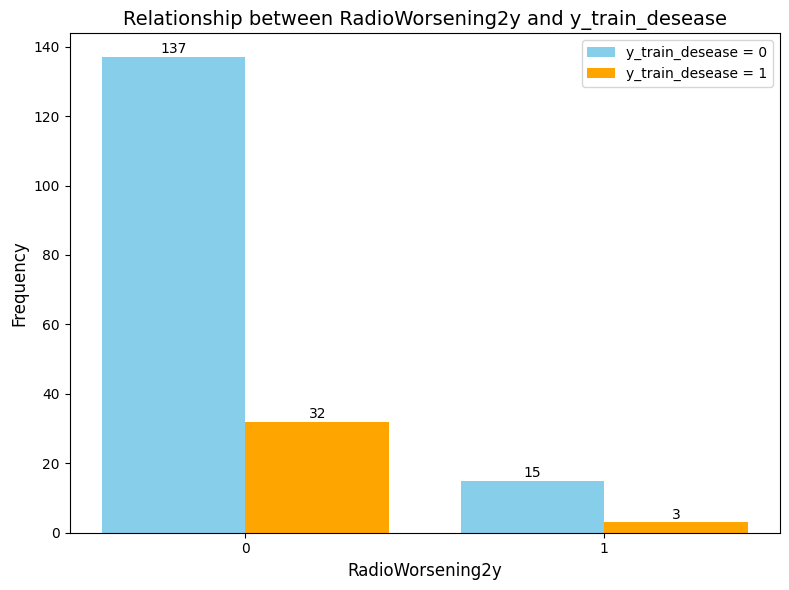

In [60]:
# bivariate plot of the variable with the highest importance with target variable 
cross_tab = pd.crosstab(train_df["Transplantation"], y_train_death)

# Gráfico de barras agrupado
fig, ax = plt.subplots(figsize=(8, 6))

x = np.arange(len(cross_tab.index))  # Posiciones en el eje X (0, 1, 3)
width = 0.4  # Ancho de las barras

# Barras para cada categoría de y_train_desease
bar1 = ax.bar(x - width / 2, cross_tab[0], width, label="y_train_desease = 0", color="skyblue")
bar2 = ax.bar(x + width / 2, cross_tab[1], width, label="y_train_desease = 1", color="orange")

# Etiquetas y formato
ax.set_xlabel("RadioWorsening2y", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Relationship between RadioWorsening2y and y_train_desease", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(cross_tab.index)
ax.legend()

# Muestra los valores sobre las barras para mayor claridad
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Muestra solo si la barra tiene altura
            ax.text(bar.get_x() + bar.get_width() / 2, height + 0.2, int(height),
                    ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()
